# Admission Prediction using Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mrgautambhagat/Machine-Learning-Notebooks/master/Admission%20Prediction%20using%20Linear%20Regression/admission_prediction.csv")
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#checking null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.drop("Serial No.",axis=1,inplace=True)

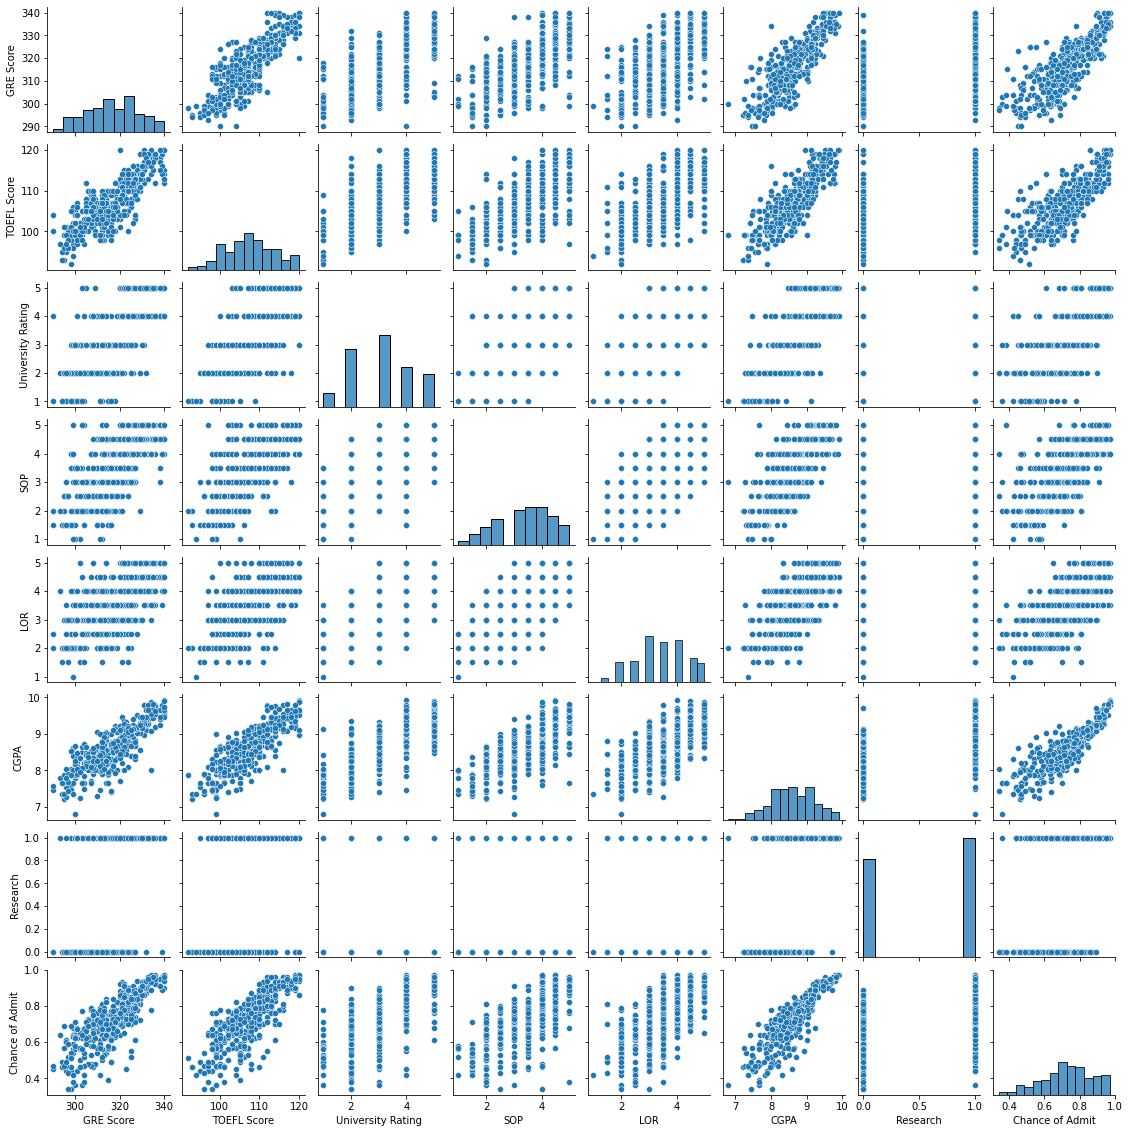

In [13]:
sns.pairplot(data = data, height = 2) 

In [14]:
X = data.drop(["Research","Chance of Admit"],axis=1)
Y = data["Chance of Admit"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()
lineReg.fit(X_train,Y_train)
print("Training Completed!")

Training Completed!


In [26]:
Y_pred= lineReg.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y_test,Y_pred)

In [35]:
print(accuracy)

0.8062468830474824


In [40]:
print("Coeff     : ",lineReg.coef_)
print("Intercept : ",lineReg.intercept_)

Coeff     :  [ 0.0020334   0.00295838  0.00845054 -0.00408227  0.02193747  0.11828966]
Intercept :  -1.3406119121112798


In [49]:
gre = int(input("GRE Score : "))
toefl = int(input("TOEFL Score : "))
unirating = float(input("University Rating : "))
sop = float(input("SOP : "))
lor = float(input("LOR : "))
cgpa = float(input("CGPA : "))

output = lineReg.predict([[gre,toefl,unirating,sop,lor,cgpa]])
output[0]*100

1.8237976095854869

In [46]:

import pickle
admissionPrediction = pickle.dumps(lineReg)
admissionModel = pickle.loads(admissionPrediction)
output = admissionModel.predict([[gre,toefl,unirating,sop,lor,cgpa]])
output[0]*100

94.04437126796905

In [47]:
MODEL_PATH = "admission_prediction.sav"
pickle.dump(lineReg,open(MODEL_PATH,'wb'))

In [50]:

MODEL_PATH = "admission_prediction.sav"
loaded_model = pickle.load(open(MODEL_PATH,'rb'))
output = loaded_model.predict([[gre,toefl,unirating,sop,lor,cgpa]])
output[0]*100

1.8237976095854869